In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
single_image = x_train[0]
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
single_image.shape

(28, 28)

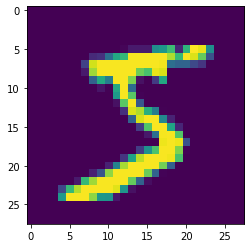

In [6]:
plt.imshow(single_image)

As the image is greyscaled the pixels range from 0-255

In [7]:
print(single_image.min())
print(single_image.max())

0
255


In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
y_train.shape

(60000,)

# Labeling

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_cat_train = to_categorical(y_train,num_classes=10)
y_cat_test = to_categorical(y_test,num_classes=10)

In [12]:
y_cat_train.shape

(60000, 10)

In [13]:
y_train[0]

5

In [14]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
y_cat_test.shape

(10000, 10)

# Preprocessing

scaling image

In [16]:
max_val=single_image.max() 

In [17]:
x_train_scal=x_train/max_val
x_test_scal=x_test/max_val

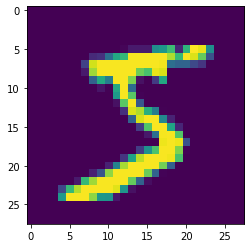

In [18]:
plt.imshow(x_train_scal[0])

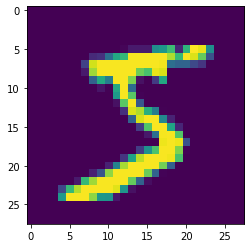

In [19]:
plt.imshow(x_train[0])

In [20]:
x_train_scal.shape

(60000, 28, 28)

# Reshaping the data

As this is grey scale image we are keeping the channel code as 1

In [21]:
x_train_scal=x_train_scal.reshape(60000, 28, 28,1) 
x_test_scal=x_test_scal.reshape(10000, 28, 28,1)

# Training the model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [23]:
model=Sequential()
#Convolutional layer. Most of the times filters will be to the power of 2 
#If the data is so complex then we can go for more filters
#padding should be done when you get decimal points when you divide input shape with kernel, here we have 28 as i/p shape 
#kernel size is 4 then if you divide 28/4 it is 7 since we didn't get any decimal number we will be proceeding without padding
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))
#Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# FLATTEN IMAGES FROM 28 by 28 to 784 BEFORE FINAL LAYER
model.add(Flatten())
# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))
# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))
# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

# Training the model

In [27]:
model.fit(x_train_scal,y_cat_train,epochs=10,validation_data=(x_test_scal,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1372 - accuracy: 0.9592 - val_loss: 0.0534 - val_accuracy: 0.9830
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0464 - accuracy: 0.9860 - val_loss: 0.0438 - val_accuracy: 0.9858
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0299 - accuracy: 0.9906 - val_loss: 0.0398 - val_accuracy: 0.9867
Epoch 4/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0198 - accuracy: 0.9934 - val_loss: 0.0472 - val_accuracy: 0.9855
Epoch 5/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0147 - accuracy: 0.9953 - val_loss: 0.0421 - val_accuracy: 0.9874


# Model evaluation

In [28]:
model.metrics_names

['loss', 'accuracy']

In [29]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.137223,0.959150,0.053448,0.9830
1,0.046366,0.986017,0.043801,0.9858
2,0.029912,0.990600,0.039752,0.9867
3,0.019771,0.993417,0.047222,0.9855
4,0.014727,0.995283,0.042118,0.9874


<AxesSubplot:>

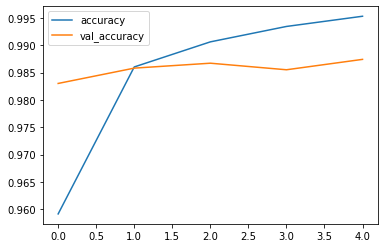

In [30]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

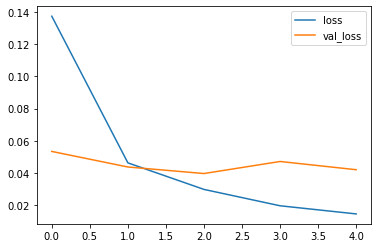

In [31]:
losses[["loss","val_loss"]].plot()

In [32]:
print(model.metrics_names)
print(model.evaluate(x_test_scal,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.04211829975247383, 0.9873999953269958]


In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
predictions = model.predict(x_test_scal)

In [35]:
predictions=np.argmax(predictions, axis=1)

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.96      1.00      0.98      1010
           4       1.00      0.99      0.99       982
           5       1.00      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [37]:
import seaborn as sns

<AxesSubplot:>

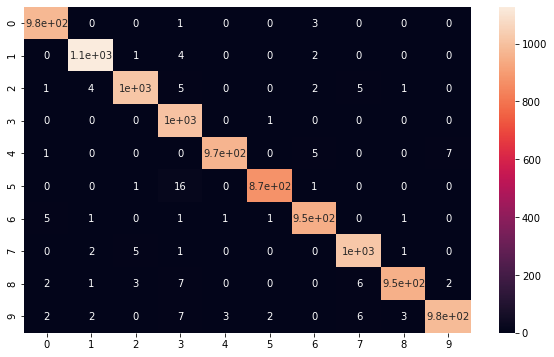

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

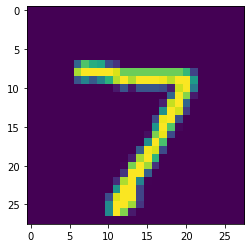

In [39]:
plt.imshow(x_test_scal[0])

In [40]:
np.argmax(model.predict(x_test_scal[0].reshape(1,28,28,1)),axis=1)

array([7], dtype=int64)